In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import tensorflow as tf
from sklearn.model_selection import train_test_split
import seaborn as sns  # Add this import for Seaborn

mlb_df = pd.read_csv("Resources/mlb_complete_8years.csv")
mlb_df.drop(columns=['Unnamed: 0','W','L','W-L%'], inplace=True)
mlb_df.head(30)


,Tm,BatAge,R/G,AB,R_x,H_x,2B,3B,HR_x,RBI,...,BF,LOB_y,DefEff,Ch,PO,A,E,DP,post_season,Year
0,Arizona Diamondbacks_2022,26.5,4.33,5351,702,1232,262,24,173,658,...,6065,1051,0.704,5746,4290,1370,86,134,False,2022
1,Atlanta Braves_2022,27.5,4.87,5509,789,1394,298,11,243,753,...,6031,1101,0.701,5803,4344,1382,77,110,True,2022
2,Baltimore Orioles_2022,27.0,4.16,5429,674,1281,275,25,171,639,...,6058,1092,0.690,5920,4300,1529,91,151,False,2022
3,Boston Red Sox_2022,28.8,4.54,5539,735,1427,352,12,155,704,...,6167,1109,0.683,5825,4293,1447,85,134,False,2022
4,Chicago Cubs_2022,27.9,4.06,5425,657,1293,265,31,159,620,...,6162,1130,0.697,5880,4331,1453,96,139,False,2022
5,Chicago White Sox_2022,29.3,4.23,5611,686,1435,272,9,149,654,...,6145,1110,0.688,5738,4343,1293,102,122,False,2022
6,Cincinnati Reds_2022,29.4,4.00,5380,648,1264,235,18,156,618,...,6220,1152,0.689,5647,4270,1296,81,115,False,2022
7,Cleveland Guardians_2022,25.9,4.31,5558,698,1410,273,31,127,662,...,5989,1018,0.709,5908,4368,1443,97,127,True,2022
8,Colorado Rockies_2022,29.1,4.31,5540,698,1408,280,34,149,669,...,6240,1110,0.673,5968,4276,1592,100,154,False,2022
9,Detroit Tigers_2022,27.9,3.44,5378,557,1240,235,27,110,530,...,6047,1086,0.701,5757,4259,1404,94,137,False,2022


In [4]:
features_df = mlb_df.drop(columns=['Tm','post_season','Year'])
target_df = mlb_df['post_season'].astype(int)

In [5]:
target_df

0      0
1      1
2      0
3      0
4      0
      ..
235    1
236    0
237    1
238    1
239    0
Name: post_season, Length: 240, dtype: int32

In [6]:
features_df.shape

(240, 36)

In [7]:
features_df

,BatAge,R/G,AB,R_x,H_x,2B,3B,HR_x,RBI,SB,...,SO_y,HBP_y,BF,LOB_y,DefEff,Ch,PO,A,E,DP
0,26.5,4.33,5351,702,1232,262,24,173,658,104,...,1216,59,6065,1051,0.704,5746,4290,1370,86,134
1,27.5,4.87,5509,789,1394,298,11,243,753,87,...,1554,62,6031,1101,0.701,5803,4344,1382,77,110
2,27.0,4.16,5429,674,1281,275,25,171,639,95,...,1214,64,6058,1092,0.690,5920,4300,1529,91,151
3,28.8,4.54,5539,735,1427,352,12,155,704,52,...,1346,72,6167,1109,0.683,5825,4293,1447,85,134
4,27.9,4.06,5425,657,1293,265,31,159,620,111,...,1383,73,6162,1130,0.697,5880,4331,1453,96,139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,28.4,3.99,5484,647,1386,288,39,137,619,69,...,1329,45,6134,1215,0.688,6107,4394,1617,96,159
236,28.5,3.98,5485,644,1383,278,32,167,612,87,...,1355,46,6069,1067,0.701,5863,4360,1408,95,118
237,28.7,4.64,5511,751,1419,279,32,172,707,101,...,1095,63,6215,1154,0.687,6142,4328,1695,119,169
238,29.5,5.50,5509,891,1480,308,17,232,852,88,...,1117,59,5984,991,0.708,6003,4323,1592,88,145


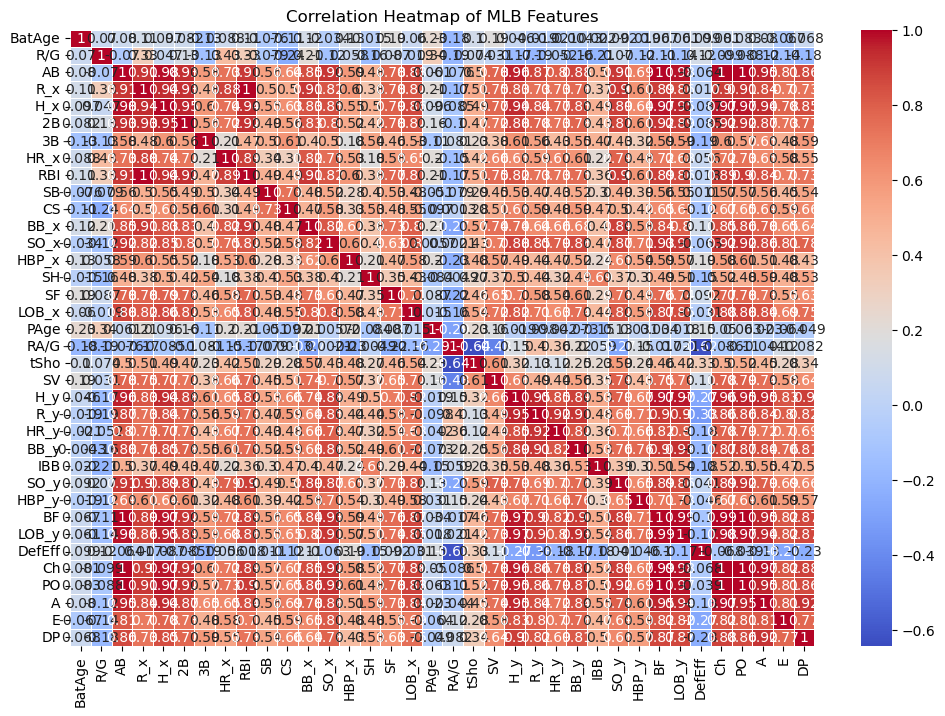

In [8]:
# Create a heatmap to visualize feature correlations
plt.figure(figsize=(12, 8))  # Set the size of the heatmap

# Compute the correlation matrix
correlation_matrix = features_df.corr()

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap of MLB Features')  # Set the title
plt.show()  # Display the heatmap